In [9]:
import pandas as pd
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

In [134]:
data = pd.read_csv("data/data HS.csv")
data = data.apply(pd.to_numeric)
data.index = range(len(data.index))

In [135]:
data.describe()

,Masse (mz),Temps (min),2905.mzML,2915.mzML,2910.mzML,2908.mzML,2907.mzML,2909.mzML,2920.mzML,2921.mzML,...,3063.mzML,3057.mzML,3067.mzML,3069.mzML,3070.mzML,3064.mzML,3071.mzML,3072.mzML,3073.mzML,Unnamed: 171
count,953.000000,953.000000,2.570000e+02,5.970000e+02,9.380000e+02,9.420000e+02,9.410000e+02,9.360000e+02,6.400000e+02,6.210000e+02,...,8.340000e+02,8.490000e+02,6.870000e+02,7.890000e+02,7.540000e+02,8.210000e+02,8.010000e+02,8.130000e+02,9.370000e+02,0.0
mean,401.237266,12.775593,2.848970e+07,1.393115e+07,9.042958e+06,1.199012e+07,9.845067e+06,1.188178e+07,1.038639e+07,1.175646e+07,...,7.864374e+06,9.047018e+06,6.101117e+06,7.662326e+06,8.353930e+06,1.022125e+07,1.149064e+07,8.548008e+06,8.404999e+06,NaN
std,182.765170,9.082042,1.508230e+08,1.499755e+08,5.653194e+07,1.049170e+08,6.278115e+07,1.075255e+08,9.294328e+07,1.113329e+08,...,4.180731e+07,6.202289e+07,5.419343e+07,6.916075e+07,5.073426e+07,7.310882e+07,8.434352e+07,4.892318e+07,6.395450e+07,NaN
min,100.076200,0.070000,1.153957e+03,1.587424e+03,1.909429e+03,1.128925e+03,1.647814e+03,1.033406e+03,1.650136e+03,1.218289e+03,...,6.790026e+02,7.627350e+02,7.000318e+02,7.785025e+02,6.252394e+02,6.248254e+02,9.129357e+02,6.041699e+02,6.794322e+02,NaN
25%,251.090900,3.450000,6.486626e+03,2.271200e+04,4.392017e+05,4.298917e+05,4.216379e+05,4.404283e+05,3.488788e+04,2.910378e+04,...,1.815433e+05,1.241830e+05,1.951525e+04,5.186177e+04,7.032113e+04,1.573161e+05,8.944431e+04,8.322214e+04,3.666882e+05,NaN
50%,385.221100,12.790000,6.871151e+04,2.321816e+05,1.237768e+06,1.224378e+06,1.208218e+06,1.246320e+06,2.577131e+05,1.955298e+05,...,1.075784e+06,9.475602e+05,1.984321e+05,3.525346e+05,7.215096e+05,1.022265e+06,7.426827e+05,7.080767e+05,1.074482e+06,NaN
75%,529.268100,17.630000,3.114525e+06,1.748981e+06,3.382552e+06,3.430531e+06,3.329601e+06,3.381251e+06,1.816548e+06,1.412820e+06,...,3.325112e+06,3.725109e+06,1.360005e+06,2.036705e+06,2.924693e+06,3.980694e+06,3.718172e+06,3.510475e+06,3.108782e+06,NaN
max,799.563300,33.730000,1.377023e+09,2.658426e+09,9.372475e+08,2.179057e+09,1.006246e+09,2.267510e+09,1.651454e+09,1.981292e+09,...,5.935889e+08,1.194016e+09,9.829642e+08,1.377654e+09,7.849653e+08,1.415301e+09,1.471922e+09,7.459674e+08,1.268439e+09,NaN


In [136]:
data = data.sort_values(by=['Temps (min)'])
data.loc[:,'2905.mzML':] = data.loc[:,'2905.mzML':].applymap(np.log)

In [137]:
data.describe()

,Masse (mz),Temps (min),2905.mzML,2915.mzML,2910.mzML,2908.mzML,2907.mzML,2909.mzML,2920.mzML,2921.mzML,...,3063.mzML,3057.mzML,3067.mzML,3069.mzML,3070.mzML,3064.mzML,3071.mzML,3072.mzML,3073.mzML,Unnamed: 171
count,953.000000,953.000000,257.000000,597.000000,938.000000,942.000000,941.000000,936.000000,640.000000,621.000000,...,834.000000,849.000000,687.000000,789.000000,754.000000,821.000000,801.000000,813.000000,937.000000,0.0
mean,401.237266,12.775593,11.926353,12.317468,13.998088,13.967346,13.958635,14.013134,12.429794,12.245494,...,13.453933,13.274097,12.055314,12.620999,12.968401,13.423927,13.207887,13.055290,13.844849,NaN
std,182.765170,9.082042,3.511650,2.762897,1.831448,1.897797,1.894486,1.805374,2.672964,2.684910,...,2.422707,2.596308,2.773044,2.570495,2.681348,2.513927,2.661562,2.722833,1.840990,NaN
min,100.076200,0.070000,7.050952,7.369868,7.554560,7.029021,7.407205,6.940615,7.408613,7.105203,...,6.520625,6.636911,6.551126,6.657372,6.438135,6.437472,6.816665,6.403856,6.521257,NaN
25%,251.090900,3.450000,8.777498,10.030649,12.992711,12.971277,12.951902,12.995503,10.459824,10.278623,...,12.109234,11.729512,9.878946,10.856337,11.160825,11.966013,11.401371,11.329269,12.812267,NaN
50%,385.221100,12.790000,11.137672,12.355275,14.028820,14.017943,14.004657,14.035700,12.459602,12.183468,...,13.888548,13.761646,12.198202,12.772904,13.489097,13.837531,13.518024,13.470308,13.887349,NaN
75%,529.268100,17.630000,14.951587,14.374544,15.034141,15.048209,15.018363,15.033756,14.412426,14.161099,...,15.017013,15.130607,14.122943,14.526844,14.888700,15.196967,15.128743,15.071262,14.949742,NaN
max,799.563300,33.730000,21.043190,21.701000,20.658458,21.502158,20.729492,21.541948,21.224922,21.407015,...,20.201698,20.900589,20.706083,21.043648,20.481150,21.070608,21.109835,20.430192,20.961053,NaN


### 1. Data to pressure

In [153]:
def data_to_presssure_values(liste,duration=2,sr=22050):
    maxliste = max(liste)
    liste = [2*e/maxliste-1 for e in liste if not np.isnan(e)] #Between -1 and 1 (amplitude)
    n = len(liste)
    durationOfOneSample = duration*sr/n
    sound = [0]*duration*sr
    for k in range(len(sound)):
        sound[k] = liste[int(k/durationOfOneSample)]
        
    return sound

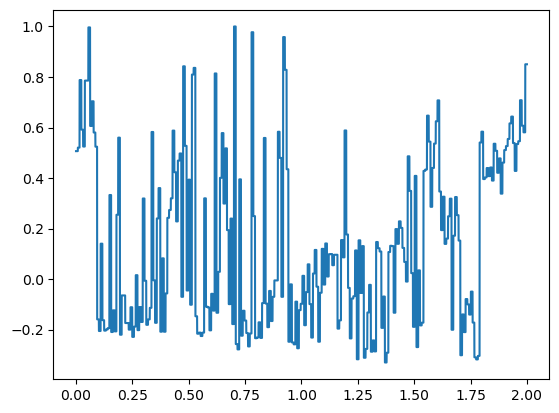

In [151]:
sr=22050
d=2
audio = data_to_presssure_values(list(data['2905.mzML']),duration=d,sr=sr)
display(ipd.Audio(audio, rate=sr))
plt.plot(np.arange(0,d,1/sr),audio)

### 2. Data to frequencies

In [237]:
def data_to_frequency_values(liste,duration=2,sr=22050,minfreq=50,maxfreq=800):
    maxliste = max(liste)
    minliste = min(liste)
    liste = [(e-minliste)*(maxfreq-minfreq)/(maxliste-minliste) + minfreq for e in liste if not np.isnan(e)] #Between minfreq and maxfreq (Hz)
    n = len(liste)
    durationOfOneSample = duration*sr/n
    sound = [0]*duration*sr
    
    for k in range(len(sound)):
        sampleNumber = int(k/durationOfOneSample)
        f = liste[sampleNumber]
        
        t = k*duration/len(sound)
        sound[k] = np.sin(2*np.pi*t*f) # current frequency
        
        x = (k%durationOfOneSample)/durationOfOneSample
        sound[k] *= -(2*x-1)**2+1 # Enveloppe, pour l'instant c'est juste une fonction en -x²

    return sound

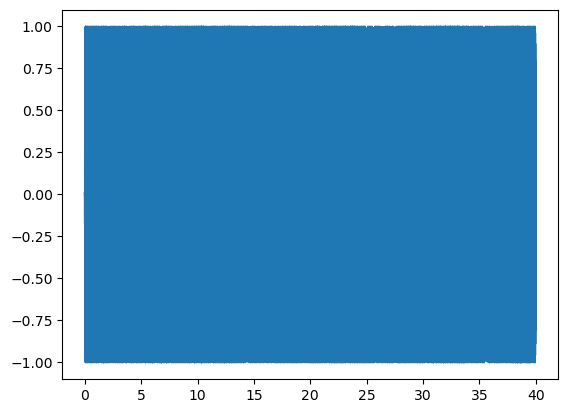

In [241]:
sr=22050
d=40
audio = data_to_frequency_values(list(data['2905.mzML']),duration=d,sr=sr)
display(ipd.Audio(audio, rate=sr))
plt.plot(np.arange(0,d,1/sr),audio)

(0.0, 1000.0)

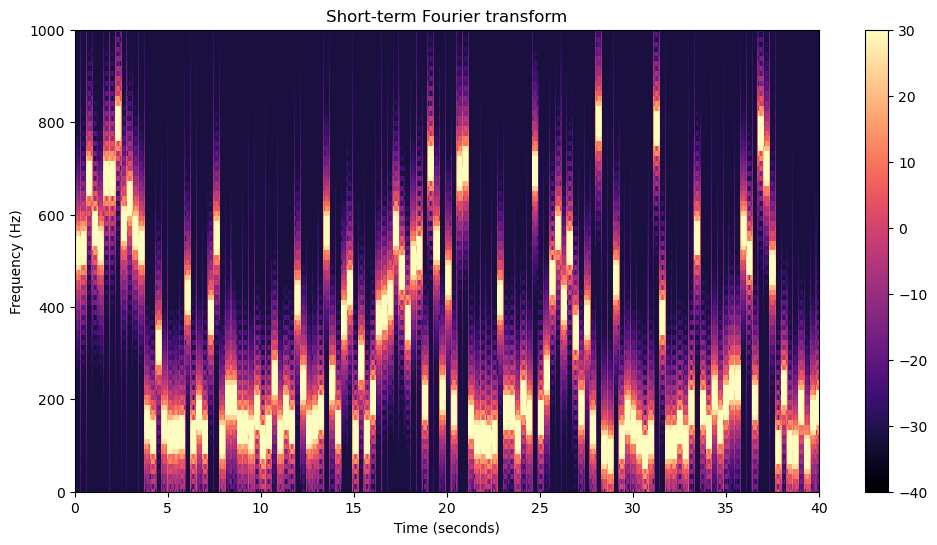

In [242]:
from librosa.display import specshow
plt.figure(figsize=(12, 6))

y_stft = librosa.stft(np.array(audio), win_length=1024)
y_spectrogram = librosa.amplitude_to_db(np.abs(y_stft))
specshow(y_spectrogram, cmap="magma", x_axis="time", y_axis="hz")
plt.title("Short-term Fourier transform")
plt.colorbar()
plt.clim(-40, 30)
plt.xlabel("Time (seconds)")
plt.xlim(0, d)
plt.ylabel("Frequency (Hz)")
plt.ylim(0, 1000)